In [168]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
from sklearn.ensemble import RandomForestClassifier # random Forest Classifier
from sklearn.ensemble import RandomForestRegressor # random Forest Regressor
from sklearn.model_selection import train_test_split #to split data between training and testing
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt # visualization library
import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

In [169]:
#imports
battles = pd.read_csv("hmb/battles.csv")
weather = pd.read_csv("hmb/weather.csv")

In [170]:
#Cleaning the weather data (removing empty weather)
weather = weather[pd.isna(weather.wx1)==False]
weather = weather[pd.isna(weather.wx2)==False]
weather = weather[pd.isna(weather.wx3)==False]
weather = weather[pd.isna(weather.wx4)==False]
weather = weather[pd.isna(weather.wx5)==False]
#Cleaning battles
battles = battles[pd.isna(battles.inita)==False]
battles = battles[pd.isna(battles.wina)==False]

In [171]:
#Drop useless fields
drop_list = ['war','name','techa','kmda','crit','quala','resa','mobila','aira','fprepa','wxa','terra',
             'locn','campgn','postype','post1','post2','leadaa','plana','surpaa','mana','logsaa',
             'fortsa','deepa','is_hero','war2','war3','war4','war4_theater','dbpedia', 'cow_warno',
             'cow_warname','war_initiator','parent',
             'front','depth','time','aeroa','surpa','cea','leada',
             'trnga','morala','logsa','momnta','intela','inita']

battles.drop(drop_list, axis=1,inplace = True)

In [172]:
#info of what is left
battles.info

<bound method DataFrame.info of      isqno  wina
1        2   1.0
2        3   1.0
4        5   1.0
6        7   1.0
8        9   1.0
10      11   1.0
11      12   1.0
12      13   1.0
13      14   1.0
14      15   1.0
16      17   1.0
17      18   1.0
18      19   1.0
19      20   1.0
20      21   1.0
22      23   1.0
25      26   1.0
26      27   1.0
27      28   1.0
28      29   1.0
29      30   1.0
31      32   1.0
32      33   1.0
33      34   1.0
34      35   1.0
35      36   0.0
36      37   1.0
37      38   1.0
39      40   1.0
41      42   1.0
..     ...   ...
568    569   1.0
569    570   1.0
570    571   1.0
571    572   1.0
575    576   1.0
576    577   1.0
577    578   1.0
579    580   1.0
580    581   1.0
581    582   1.0
583    584   1.0
584    585   0.0
586    587   1.0
589    590   1.0
590    591   1.0
593    594   1.0
594    595   1.0
596    597   1.0
600    601   1.0
601    602   1.0
603    604   1.0
609    610   1.0
616    617   1.0
617    618   1.0
619    620   1.0

In [173]:
#Concat and Droping primary_id useless
result = pd.concat([battles,weather], axis=1, join='inner')

drop_list = ['isqno']
result.drop(drop_list, axis=1,inplace = True)

In [174]:
resultWin = result[result.wina==1.0]

D    240
W    109
Name: wx1, dtype: int64


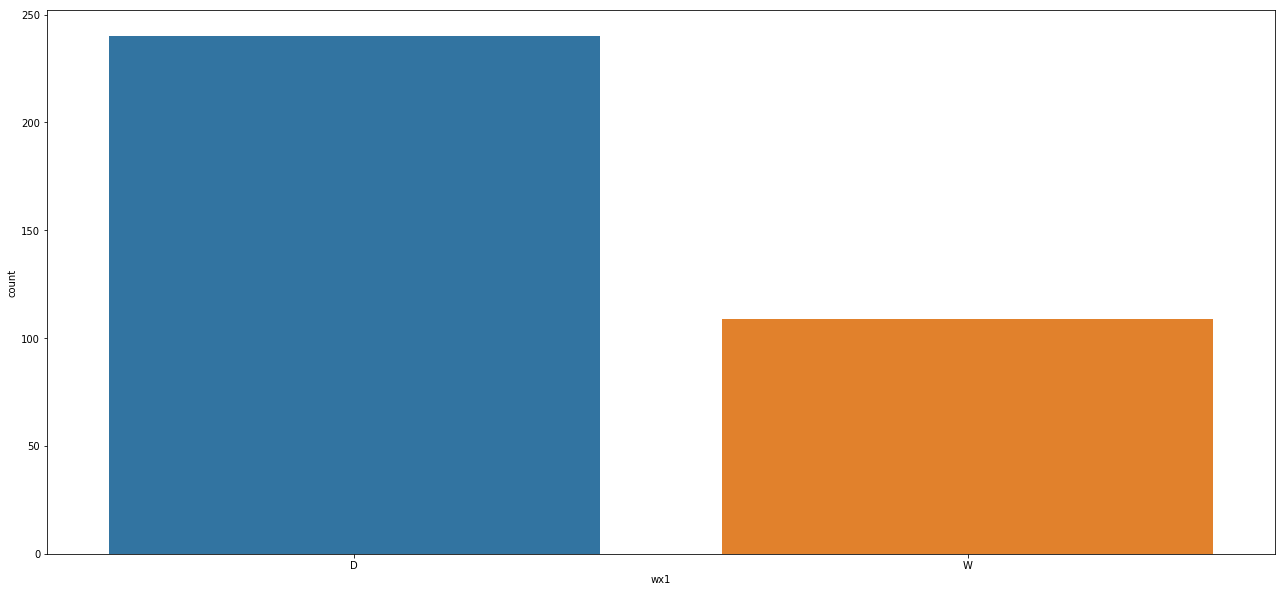

In [175]:
#show climate
#D - DRY
#W - WET
print(resultWin['wx1'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(resultWin['wx1'])
plt.show()

S    240
L     78
H     31
Name: wx2, dtype: int64


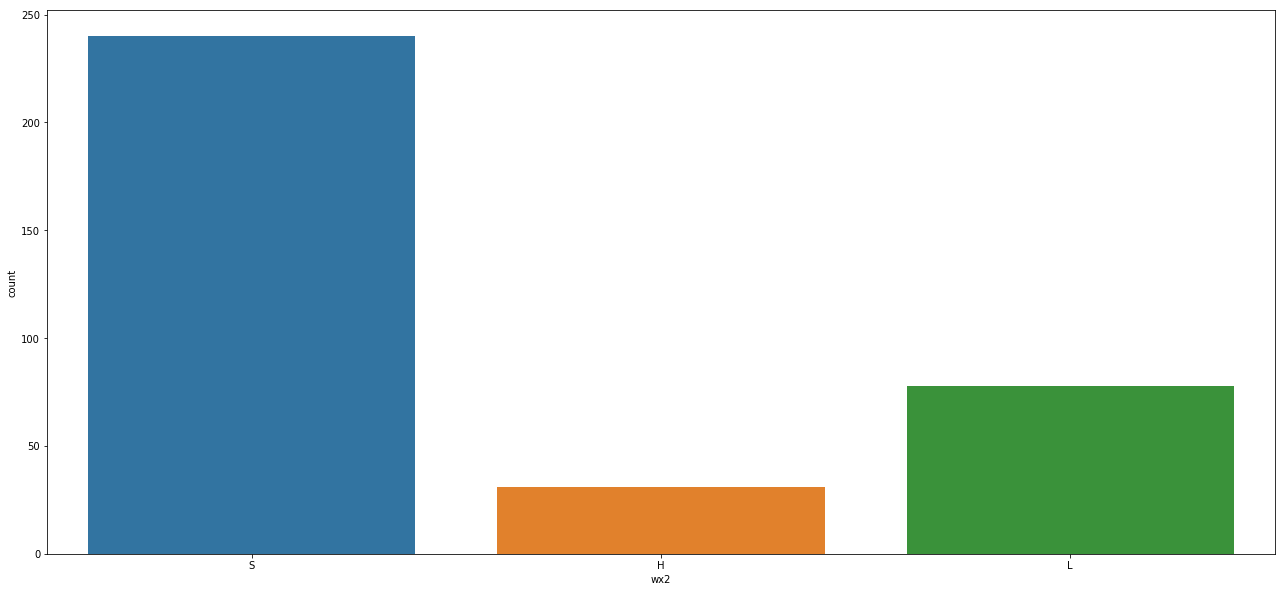

In [176]:
#show climate
#H - Heavy Precipitatiion
#S - Sunny
#L - Light Precipitation
#O - Overcast (no precipitation)
print(resultWin['wx2'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(resultWin['wx2'])
plt.show()

T    292
C     37
H     20
Name: wx3, dtype: int64


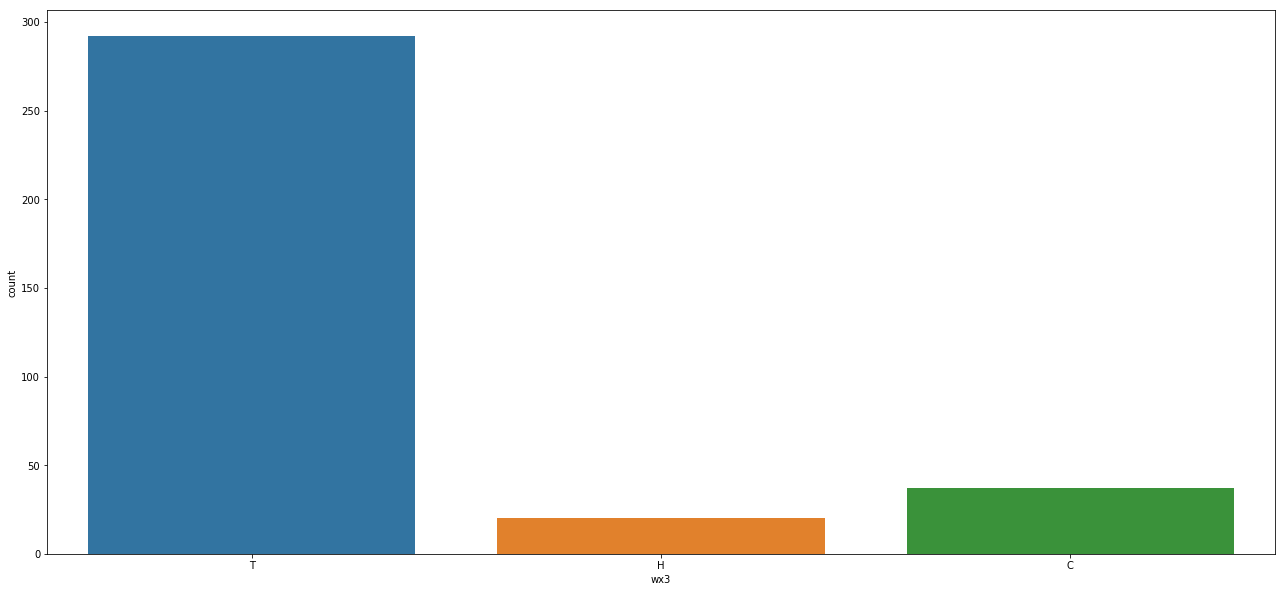

In [177]:
#show climate
#H - Hot
#S - Cold
#T - Temperate
print(resultWin['wx3'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(resultWin['wx3'])
plt.show()

S    121
F    111
$     77
W     40
Name: wx4, dtype: int64


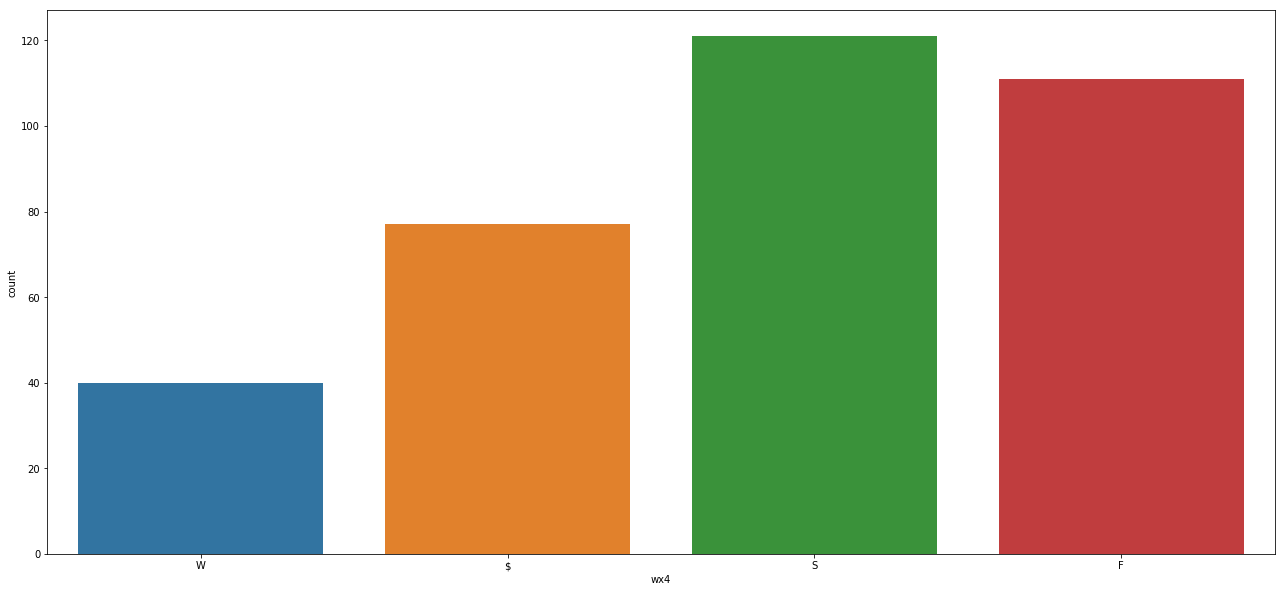

In [178]:
#show climate
#$ - Spring
#S - Summer
#W - Winter
#F - Fall
print(resultWin['wx4'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(resultWin['wx4'])
plt.show()

T    341
D      6
E      2
Name: wx5, dtype: int64


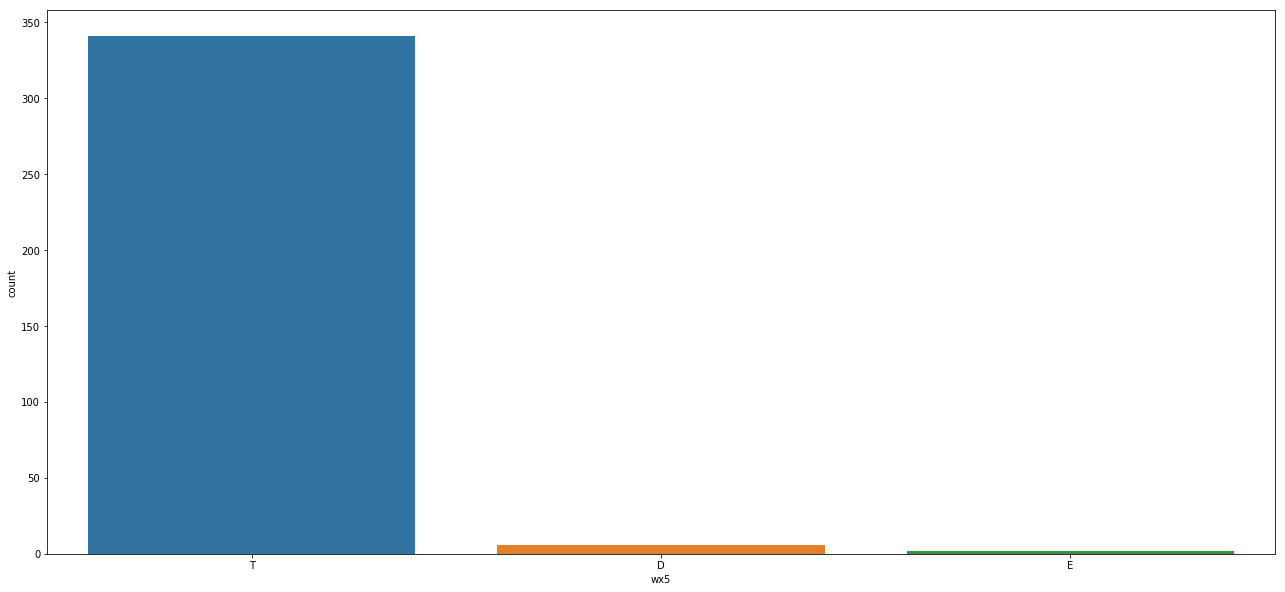

In [179]:
#show climate
#E - Tropical (i.e., "Equatorial")
#D - Desert
#T - Temperate
print(resultWin['wx5'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(resultWin['wx5'])
plt.show()

In [180]:
#Transform Categorical in numeric
battles_relevant = pd.get_dummies(result)
battles_relevant.info

<bound method DataFrame.info of      wina  wxno  wx1_D  wx1_W  wx2_H  wx2_L  wx2_S  wx3_C  wx3_H  wx3_T  \
1     1.0     1      1      0      0      0      1      0      0      1   
2     1.0     1      1      0      0      0      1      0      1      0   
4     1.0     1      1      0      0      0      1      0      0      1   
6     1.0     1      1      0      0      0      1      0      0      1   
8     1.0     1      1      0      0      0      1      0      0      1   
10    1.0     1      1      0      0      0      1      0      0      1   
11    1.0     1      1      0      0      0      1      0      0      1   
12    1.0     1      1      0      0      0      1      0      0      1   
13    1.0     1      1      0      0      0      1      0      0      1   
14    1.0     1      1      0      0      0      1      0      0      1   
16    1.0     1      1      0      0      0      1      0      0      1   
17    1.0     1      1      0      0      0      1      0      0    

In [185]:
# Labels are the values we want to predict
labels = np.array(battles_relevant['wina'])
# Remove the labels from the features
# axis 1 refers to the columns
battles_relevant= battles_relevant.drop('wina', axis = 1)
# Saving feature names for later use
battle_list = list(battles_relevant.columns)
# Convert to numpy array
battles_relevant = np.array(battles_relevant)

In [186]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(battles_relevant, labels, test_size = 0.20,random_state = 12)
print(train_features)

[[1 1 0 ... 0 0 1]
 [1 1 0 ... 0 0 1]
 [1 1 0 ... 0 0 1]
 ...
 [2 0 1 ... 0 0 1]
 [1 0 1 ... 0 0 1]
 [1 1 0 ... 0 0 1]]


In [187]:
#over sampling
sm = SMOTE(random_state=12, ratio = 1.0)
train_features_over, train_labels_over = sm.fit_sample(train_features, train_labels)

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 10000, random_state = 12)
# Train the model on training data
rf.fit(train_features_over, train_labels_over);

In [191]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error and accuracy
print('Mean Absolute Error:', round(np.mean(errors), 3))
print('Accuracy:', 100 * round((1 - np.mean(errors)), 3),'%.')

Mean Absolute Error: 0.286
Accuracy: 71.39999999999999 %.


In [189]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_labels, predictions)
print(conf_mat)

[[ 2  4]
 [18 53]]


In [200]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree/tree.dot', feature_names = battle_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree/tree.dot')
# Write graph to a png file
graph.write_png('tree.png')